In [27]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [28]:
#archivos = r'C:\Users\gaston\Documents\proyecto grupal EDA\PG-Grupo3-main\maps'
archivos = os.path.join("PG-Grupo3-main", "maps")

In [29]:
archivos_json = glob.glob(os.path.join(archivos , "*.json"))

In [30]:
# Se guardará archivos JSON en formato pickle (binario) el cual es más rápido para futuras consultas
for archivos in archivos_json:
    df = pd.read_json(archivos, lines=True)
    df.to_pickle(archivos.replace(".json", ".pkl"))  # Guardar como .pkl

In [31]:
df_sitios_rest = df[df['category'].apply(lambda x: isinstance(x, list) and 'Pizza restaurant' in x)]
print(df_sitios_rest.head(10))

                                    name  \
11   Stagecoach Inn Restaurant and Lodge   
20                             Pizza Hut   
133                    Papa John's Pizza   
186                       Domino's Pizza   
202         Captain Tony's Pizza & Pasta   
341                            Pizza Hut   
375             Poor Gary's Pizza & Subs   
464                       Domino's Pizza   
495                          Urban Pizza   
517                   Giuseppes Pizzeria   

                                               address  \
11   Stagecoach Inn Restaurant and Lodge, 204 S Bay...   
20        Pizza Hut, 14431 Culver Dr, Irvine, CA 92604   
133  Papa John's Pizza, 400 US-130 Ste 6, Hightstow...   
186  Domino's Pizza, 550 E Laburnum Ave, Richmond, ...   
202  Captain Tony's Pizza & Pasta, 1405 E 9th St, C...   
341       Pizza Hut, 1607 Elkhart Rd, Goshen, IN 46526   
375  Poor Gary's Pizza & Subs, 215 Main St, Biwabik...   
464  Domino's Pizza, 237 W 64th St, Loveland, CO 80

In [32]:
# Extract state (two uppercase letters) using regex
df_sitios_rest['state'] = df_sitios_rest['address'].str.extract(r',\s*([A-Z]{2})\s*\d{5}') 
df_sitios_rest['state'].head()

11     IL
20     CA
133    NJ
186    VA
202    OH
Name: state, dtype: object

In [33]:
# selecciono las pizzerias de NJ y NY
df_sitios_rest = df_sitios_rest[df_sitios_rest['state'].isin(['CA', 'GA','NV'])]
df_sitios_rest = df_sitios_rest[['gmap_id','MISC', 'state', 'avg_rating']]
df_sitios_rest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 20 to 273072
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gmap_id     339 non-null    object 
 1   MISC        339 non-null    object 
 2   state       339 non-null    object 
 3   avg_rating  339 non-null    float64
dtypes: float64(1), object(3)
memory usage: 13.2+ KB


In [34]:
#
from collections import Counter
import pandas as pd
import ast  # si los valores vienen como string de diccionario

# Supongamos que tu columna se llama 'MISC'
# Si los datos están como texto (string), conviértelos a dict
df_sitios_rest['MISC'] = df_sitios_rest['MISC'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Contador para acumular todas las etiquetas
contador = Counter()

# Iteramos por cada fila de la columna MISC
for row in df_sitios_rest['MISC'].dropna():
    for categoria, etiquetas in row.items():
        if isinstance(etiquetas, list):
            contador.update(etiquetas)

# Obtener las 30 etiquetas más comunes
top_30 = contador.most_common(30)

# Convertir a DataFrame para visualizar mejor
df_top30 = pd.DataFrame(top_30, columns=['etiqueta', 'frecuencia'])

#print(df_top30)
df_sitios_rest.head(10)

,gmap_id,MISC,state,avg_rating
20,0x80dcdc5fac2a2035:0x1b43e165067c8544,"{'Service options': ['Takeout', 'Delivery'], '...",CA,2.8
495,0x80e824e327d29463:0x891bd03d8d430fdf,"{'Service options': ['Outdoor seating', 'Takeo...",CA,4.4
517,0x80dafe7cf3b9d4c5:0x55c34fadbcbc4d80,"{'Service options': ['Takeout', 'Delivery'], '...",CA,4.3
1510,0x80857e9cd56f8f87:0x1db6e11fc7c42d88,"{'Service options': ['Delivery', 'Takeout'], '...",CA,3.6
1681,0x8094660280f090e1:0x7675086d7e9086cf,"{'Service options': ['Takeout', 'Delivery', 'D...",CA,4.1
2297,0x80c2cfa6122e7257:0x9175b94430535d16,"{'Service options': ['Curbside pickup', 'Deliv...",CA,4.2
3170,0x88fa46e768352589:0x1715293a124c2f9a,"{'Service options': ['No-contact delivery', 'D...",GA,4.1
4309,0x80c2b482ebe9e0cb:0x380f2994c67d8a58,"{'Service options': ['No-contact delivery', 'D...",CA,4.0
5957,0x80c29abd25e79817:0x5f9f3d83648521bf,"{'Service options': ['No-contact delivery', 'D...",CA,4.2
6478,0x80c2a4d1a14023b3:0x7c3cc33cb86a7b68,"{'Service options': ['Outdoor seating', 'No-co...",CA,3.9


In [35]:
df_sitios_rest['MISC'].dropna(inplace=True)
df_sitios_rest['MISC'].dropna(inplace=True)
df_sitios_rest=df_sitios_rest[df_sitios_rest['avg_rating'] >= 4.0] # filtramos por rating alto ya que solo nos interesan los atributos que la gente quiere
df_sitios_rest.columns

Index(['gmap_id', 'MISC', 'state', 'avg_rating'], dtype='object')

In [36]:
import pandas as pd
import ast
from sklearn.preprocessing import MultiLabelBinarizer
# Paso 1: Asegurarse de que 'MISC' sea diccionario
df_sitios_rest['MISC'] = df_sitios_rest['MISC'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Paso 2: Extraer todas las etiquetas en una lista por fila
def extraer_etiquetas(misc):
    if isinstance(misc, dict):
        etiquetas = []
        for lista in misc.values():
            if isinstance(lista, list):
                etiquetas.extend(lista)
        return etiquetas
    return []

df_sitios_rest['etiquetas_misc'] = df_sitios_rest['MISC'].apply(extraer_etiquetas)

# Paso 3: Convertir a variables dummies (binarias)
mlb = MultiLabelBinarizer()
dummies = pd.DataFrame(mlb.fit_transform(df_sitios_rest['etiquetas_misc']), 
                       columns=mlb.classes_,
                       index=df_sitios_rest.index)

# Paso 4: Unir al dataframe original
df_sitios_rest = pd.concat([df_sitios_rest, dummies], axis=1)

# dataset filtrado para el mapa de calor
df_mapa_calor = df_sitios_rest.copy() 
df_mapa_calor.drop(columns=['gmap_id','MISC','state','etiquetas_misc'], inplace=True)
print(df_mapa_calor.head(10))



      avg_rating  Accepts reservations  Alcohol  All you can eat  Bar onsite  \
495          4.4                     0        1                0           0   
517          4.3                     0        0                0           0   
1681         4.1                     0        0                0           0   
2297         4.2                     0        0                0           0   
3170         4.1                     0        0                0           0   
4309         4.0                     0        0                0           0   
5957         4.2                     0        0                0           0   
7561         4.4                     0        0                0           0   
7632         4.2                     0        0                0           0   
7900         4.6                     0        0                0           0   

      Beer  Breakfast  Cash-only  Casual  Catering  ...  \
495      1          0          0       0         0  ...   
5

In [37]:

# Asegurate de tener solo columnas numéricas (float, int, bool)
df_corr = df_mapa_calor.select_dtypes(include=['float64', 'int64', 'uint8'])

# Calcular la matriz de correlación
matriz_corr = df_corr.corr()

# Extraer correlación con 'stars_by_user', quitándola de sí misma
correlaciones_ordenadas = (
    matriz_corr['avg_rating']
    .drop('avg_rating')
    .sort_values(ascending=False)  # De mayor a menor
    .to_frame(name='correlación')
)

# Mostrar las 15 variables más correlacionadas
print(correlaciones_ordenadas.head(15))


                                                    correlación
Cozy                                                   0.324009
Solo dining                                            0.152013
Staff required to disinfect surfaces between vi...     0.149120
Casual                                                 0.146393
Coffee                                                 0.142136
Tourists                                               0.140086
Small plates                                           0.134674
Accepts reservations                                   0.133983
Mask required                                          0.129337
Great cocktails                                        0.127642
Great wine list                                        0.127642
Dinner reservations recommended                        0.127642
Upscale                                                0.127642
Romantic                                               0.127642
Great dessert                           

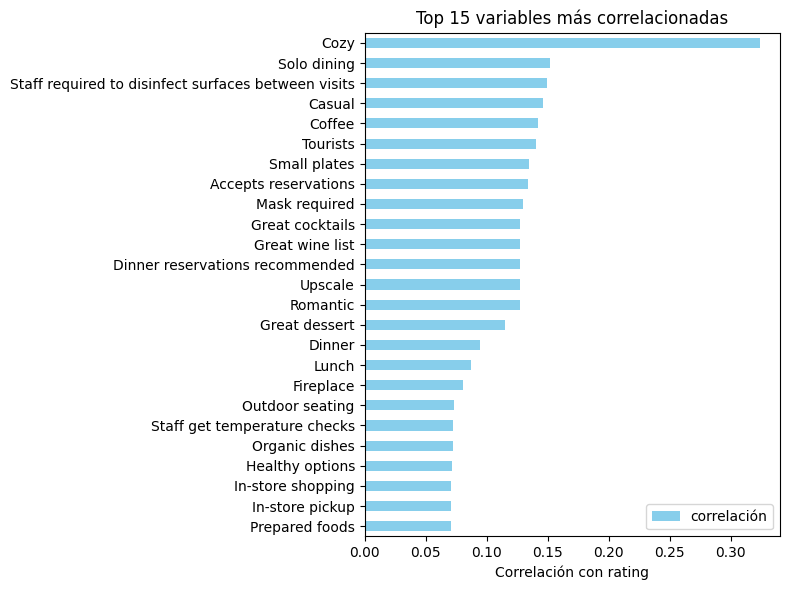

In [38]:
import matplotlib.pyplot as plt

correlaciones_ordenadas.head(25).plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.xlabel("Correlación con rating")
plt.title("Top 15 variables más correlacionadas")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Valor de la correlacion:

0.00–0.10	Muy débil / nula

0.10–0.30	Débil pero posible relación

0.30–0.50	Moderada

Resumen: esto muestra algunos de los atributos mas comunes en las pizzeria y como se relaciona favorablemente con el rating de la pizzeria